---
<img src="https://ead.ufes.br/pluginfile.php/188418/course/summary/Banner%20IA%20e%20CD.png" style="float: right;">


# Redução de dimensionalidade


Não se apegue aqui com os detalhes da linguagem, você verá Python na próxima disciplina.

**Objetivos**

A intenção dessa aula é que você se familiarize com os principais conceitos do algoritmo PCA. Entendender o algoritmo não é trivial. Desta forma, nesta aula focaremos em entender o conceito de variância explicada.

**Resultados Esperados**

1. Entender o pipeline para redução de dimensionalidade
1. Utilizar o PCA do Sci-kit learn
1. Carregar um conjunto de dados padrão: a base de dados  *Wine*
1. Comparar uma regressão realizada com os dados brutos versus uma com os componentes principais.


# Introdução



**Redução de dimensionalidade** é uma técnica utilizada em ciência de dados e aprendizado de máquina para diminuir o número de variáveis ou características em um conjunto de dados, mantendo ao máximo possível a quantidade de informação original. O objetivo principal é simplificar os dados, facilitar a visualização, acelerar o processamento e evitar o problema de **overfitting** (excesso de ajuste).

### Por que reduzir a dimensionalidade?

- **Dimensionalidade alta causa complexidade**: Muitos conjuntos de dados possuem dezenas, centenas ou até milhares de variáveis (dimensões). Isso torna os algoritmos de aprendizado de máquina mais difíceis de treinar e pode reduzir a performance. Em problemas de alta dimensionalidade, a complexidade aumenta exponencialmente, o que é chamado de "maldição da dimensionalidade".
  
- **Reduzir ruído**: Muitas variáveis em um conjunto de dados podem ser irrelevantes ou redundantes, e a redução de dimensionalidade pode ajudar a remover esses fatores, mantendo apenas os componentes mais importantes.
  
- **Visualização de dados**: Para conjuntos de dados de alta dimensionalidade, pode ser impossível visualizá-los diretamente. Técnicas de redução de dimensionalidade, como PCA, podem ajudar a projetar os dados em 2 ou 3 dimensões para facilitar a visualização.

### Métodos de Redução de Dimensionalidade

1. **Métodos Lineares**
   - **PCA (Análise de Componentes Principais)**: PCA é uma técnica que transforma os dados em uma nova base de componentes principais que capturam a maior parte da variância dos dados. Os componentes principais são ordenados de acordo com a quantidade de variância que explicam, e as dimensões menos relevantes (que explicam menos variância) podem ser descartadas.
   
   - **LDA (Análise Discriminante Linear)**: Similar ao PCA, mas o objetivo do LDA é maximizar a separação entre diferentes classes, tornando-o útil para problemas de classificação.

2. **Métodos Não-Lineares**
   - **t-SNE (T-Distributed Stochastic Neighbor Embedding)**: t-SNE é uma técnica não-linear frequentemente usada para visualização em 2D ou 3D. Ele preserva as relações locais dos dados, o que significa que pontos semelhantes nos dados originais continuarão próximos uns dos outros na projeção reduzida.
   
   - **UMAP (Uniform Manifold Approximation and Projection)**: UMAP é uma técnica não-linear mais recente, usada para visualização de alta dimensionalidade, que preserva tanto a estrutura global quanto a local dos dados.

3. **Seleção de Características (Feature Selection)**: Diferente das técnicas de transformação, a seleção de características tenta escolher um subconjunto das características originais. Métodos como eliminação recursiva de características ou uso de técnicas de regularização (como Lasso) podem ser aplicados.

### Exemplo de Redução de Dimensionalidade

Vamos considerar um conjunto de dados com 100 variáveis (dimensões). Aplicando PCA, podemos descobrir que apenas os primeiros 10 componentes principais explicam 95% da variância dos dados. Neste caso, podemos reduzir as 100 variáveis originais para apenas 10 componentes principais sem perder muito da informação dos dados originais.

### Desvantagens

- **Perda de informação**: Embora a redução de dimensionalidade tente preservar o máximo de informação, inevitavelmente haverá alguma perda.
- **Escolha do método**: Diferentes métodos podem levar a diferentes resultados, e a escolha da técnica certa depende dos dados e do problema em questão.

## Scikit-Learn - Mapa de algoritmos disponíves

[<img src="https://scikit-learn.org/1.3/_static/ml_map.png" style="float: right;">](https://scikit-learn.org/1.3/tutorial/machine_learning_map/index.html)


# PCA

O PCA transforma os dados em uma nova base de coordenadas chamada **componentes principais**. Cada um desses componentes principais é uma combinação linear das variáveis originais e é ordenado de acordo com a quantidade de variância que explica.

A **variância explicada** por cada componente principal é uma medida da quantidade de informação dos dados originais que aquele componente retém. O primeiro componente principal explica a maior parte da variância, o segundo explica a segunda maior parte (sujeito à restrição de ser ortogonal ao primeiro), e assim por diante.


A biblioteca ``scikit-learn`` possui a classe ``PCA`` que encapsula todos os detalhes de implementação do ``PCA``   (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

Após executado, o `PCA` retorna uma lista contendo a proporção da variância total dos dados originais que é explicada por cada um dos componentes principais (`explained_variance_ratio_`.).

### Exemplo prático:

Se tivermos um dataset com 10 variáveis, e após aplicar o PCA, os primeiros três componentes principais explicam, respectivamente, 50%, 30%, e 10% da variância, o atributo `explained_variance_ratio_` poderia ser algo assim:

```python
explained_variance_ratio_ = [0.50, 0.30, 0.10, ...]
```

Aqui, os três primeiros componentes principais explicariam 90% da variância total (0.50 + 0.30 + 0.10 = 0.90). Isso nos diz que podemos reduzir as 10 variáveis originais para 3 componentes sem perder muita informação.

## Exemplo neste Colab - PCA com o Wine Dataset


Um conjunto de dados real comumente utilizado para PCA e outras tarefas de aprendizado de máquina é o **Wine Dataset** da UCI Machine Learning Repository. Ele contém análises químicas de vinhos cultivados na mesma região da Itália, mas derivados de três diferentes cultivadores.


**[Wine Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine)**

Este conjunto de dados possui 13 características (propriedades químicas) para 178 amostras de vinho.


O Wine dataset é disponibilizado como um *Toy dataset* pelo scikitlearn.

In [ ]:
#@title Carregando as bibliotecas e o dataset wine

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import pandas as pd

X, y = load_wine(return_X_y=True, as_frame = True);

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Reduzindo os componentes com PCA

Necessário informar quantas dimensões deseja.

`pca.explained_variance_ratio_`  explica a variância de cada componente

In [ ]:
pca = PCA(n_components = 13)
pca.fit(X);
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

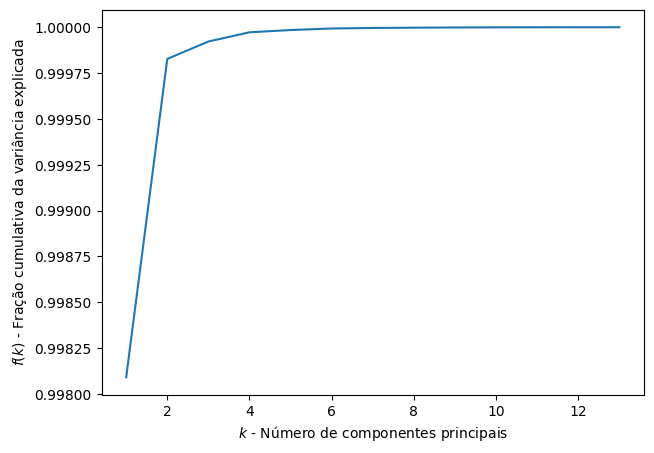

In [ ]:
#@title
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, pca.n_components + 1)], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada');

Aparentemente,  2 dimensões explicariam 99% dos dados.

Vamos reduzir para 2 componentes e plotar as classe.

In [ ]:
pca = PCA(n_components = 2)
X2 = pca.fit_transform(X)

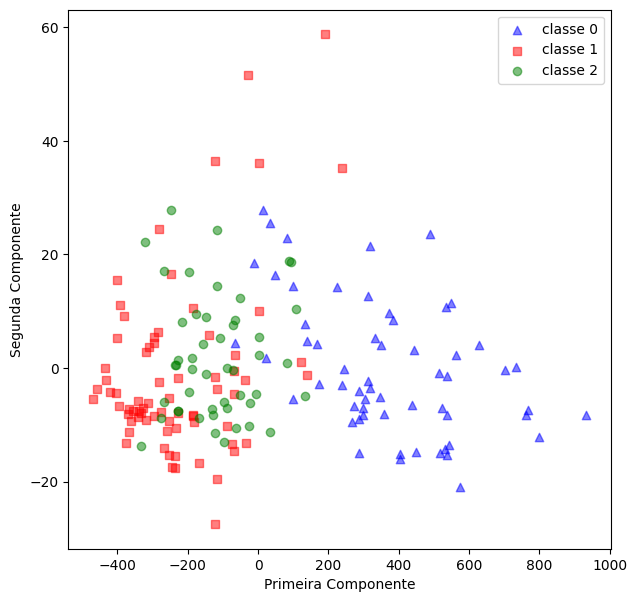

In [ ]:
#@title
plt.figure(figsize=(7, 7))
for l, c, m in zip(range(0, 3), ("blue", "red", "green"), ("^", "s", "o")):
  plt.scatter(X2[y == l, 0], X2[y == l, 1], color=c, label="classe %s" % l, alpha=0.5, marker=m)
plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');

## Normalizando os dados
Como podemos observar,  as classes  (vermelho, verde e azul) não estão bem definidas.

O que fizemos está correto.  No entanto, repare que as colunas  têm unidades de medidas diferentes. Por isso, os valores de colunas estão em ordens de grandezas diferentes.

Vamos então gerar uma cópia normalizada para transformar os valores das colunas para que todas tenham a "mesma ordem de grandeza".


In [ ]:
Z = X.copy()
scaler = StandardScaler(with_mean=True, with_std=True)

# Colunas de Z terão média 0 e desvio padrão 1
Z[Z.columns] = scaler.fit_transform(Z)
Z.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
pca = PCA(n_components =2)
pca.fit(Z.values);
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

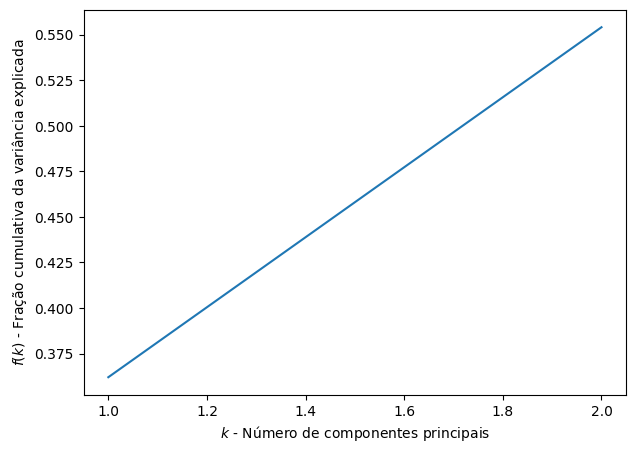

In [ ]:
#@title
fig = plt.figure(figsize=(7, 5))
plt.plot([i for i in range(1, pca.n_components + 1)], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel(r'$k$ - Número de componentes principais')
plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada');

### Redefindo o número de componentes


In [ ]:
pca = PCA(n_components = 2)
X2 = pca.fit_transform(Z)

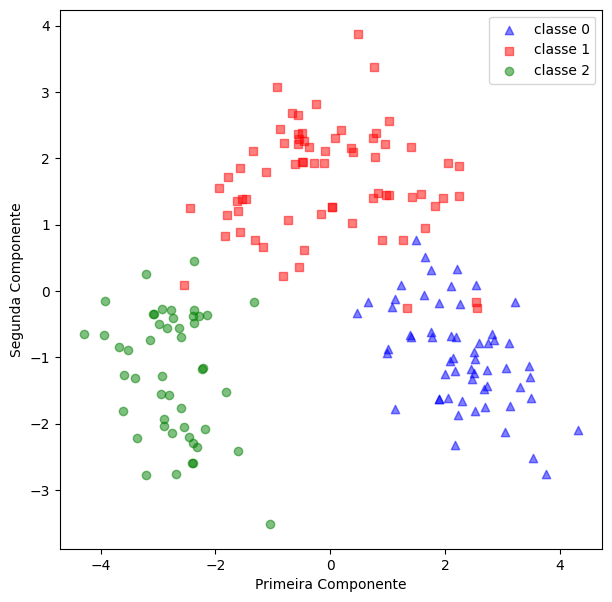

In [ ]:
#@title Plotando o resultado
plt.figure(figsize=(7, 7))

for l, c, m in zip(range(0, 3), ("blue", "red", "green"), ("^", "s", "o")):
  plt.scatter(X2[y == l, 0], X2[y == l, 1], color=c, label="classe %s" % l, alpha=0.5, marker=m)

plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');
plt.legend(loc = 'best');

Agora temos um resultado que usando apenas 2 componentes consegue distinguir e fazer uma melhor separação das classes de vinho.


## Efeitos da escala dos atributos no PCA

Se um atributo varia mais do que  outros somente por causa de suas respectivas escalas, o PCA determinaria que tal atributo domina a direção dos componentes principais.

Podemos inspecionar os primeiros componentes principais usando os atributos originais:

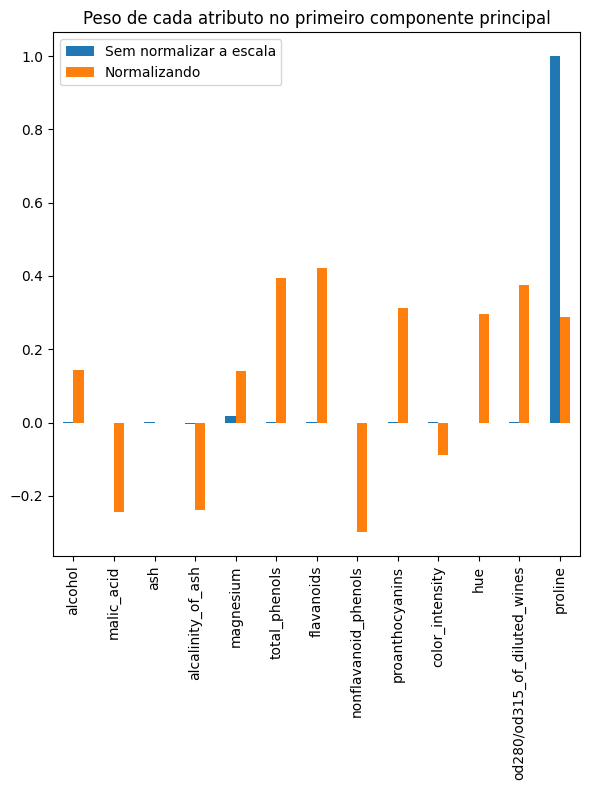

In [ ]:
#@title sem normalizar vs normalizando os atributos
pca = PCA(n_components=2).fit(X)
scaled_pca = PCA(n_components=2).fit(Z)
X_train_transformed = pca.transform(X)
X_train_std_transformed = scaled_pca.transform(Z)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["Sem normalizar a escala"]
)
first_pca_component["Normalizando"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Peso de cada atributo no primeiro componente principal", figsize=(6, 8)
)

_ = plt.tight_layout()

# Impacto na acurácia na escala dos componentes principais


In [ ]:
#@title Separando em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [ ]:
#@title  cria um modelo de regressão logística
import numpy as np

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

Cs = np.logspace(-5, 5, 20)

unscaled_clf = make_pipeline(pca, LogisticRegressionCV(Cs=Cs))
unscaled_clf.fit(X_train, y_train)

scaled_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=Cs))
scaled_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])))])

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

y_pred = unscaled_clf.predict(X_test)
y_pred_scaled = scaled_clf.predict(X_test)
y_proba = unscaled_clf.predict_proba(X_test)
y_proba_scaled = scaled_clf.predict_proba(X_test)

print("Acurácia para o PCA sem escala")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Acurácia para o PCA com escala")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")


Acurácia para o PCA sem escala
35.19%

Acurácia para o PCA com escala
96.30%



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


#Exercícios  

O objetivo deste exercício é ilustrar a do número de componentes principais e a variância explicada utilizados na acurácia do algoritmo.

Explique com suas palavras a saída do  código a seguir. Altere o `n_components` para elaborar sua resposta.

Lembrando que $1 \leq \text{n_components} \leq 13$.

A explicação deverá ser realizada na própria atividade do Moodle.

In [ ]:
pca = PCA(n_components =2)
pca.fit(Z.values);
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

Analisando a saída do código PCA e explicando a variação

O código Python apresentado realiza uma análise de componentes principais (PCA) em um conjunto de dados
representado pela matriz Z.values. PCA é uma técnica estatística usada para reduzir a dimensionalidade
dos dados, transformando um conjunto de variáveis ​​possivelmente correlacionadas em um conjunto menor de
novas variáveis ​​não correlacionadas, chamadas componentes principais.

Analisando partes do código:

pca = PCA(n_components = 2): Cria um objeto PCA informando que queremos reduzir a dimensionalidade dos
dados para apenas 2 componentes principais.

pca.fit(Z.values): ajusta um modelo PCA aos dados e calcula os componentes principais.

pca.explained_variance_ratio_: Retorna uma matriz da proporção da variância total explicada por cada
componente principal.

Interpretação da saída

O output ([0,36198848, 0,1920749]) indica que:

Primeiro Componente Principal: Explica 36,19% da variância total nos dados originais.
Segundo componente principal: Explica 19,21% da variância total dos dados originais.

Os dois primeiros componentes principais juntos explicam 36,19% + 19,21% = 55,4% da
variância total dos dados.

Alterando n_components

O que acontece quando se altera n_components?

Aumentando n_components:

Explicando mais variação: Ao incluir mais componentes, captura se mais variabilidade nos dados originais.
No entanto, a interpretação dos componentes pode ser mais complicada.
Dimensionalidade aumentada: A dimensionalidade dos dados transformados é aumentada, o que pode não ser desejável
em alguns casos, especialmente se a interpretabilidade for importante.

Reduzindo n_components:

Menos variação explicada: perde se algumas das informações originais, mas a interpretação dos componentes
pode ser mais fácil.
Maior redução da dimensionalidade: A dimensionalidade dos dados transformados é reduzida mais drasticamente.

Exemplo:

Se você definir n_components = 3, a matriz de saída terá três valores que representam a proporção da variação
explicada por cada um dos três primeiros componentes principais. A soma desses valores será maior que 55,4%
porque se está capturando mais da variância total dos dados.

Considerações

Escolha do número de componentes: A escolha do número ideal de componentes é um compromisso entre a capacidade
de explicar a variância e a facilidade de interpretação.

Critérios de seleção: Existem vários critérios para seleção do número de componentes, como o critério de Kaiser
(preservação de componentes com autovalor maior que 1), o scree plot (elbow plot) e a explicação da variância
acumulada.

Interpretação dos componentes: Cada componente principal é uma combinação linear das variáveis ​​originais.
A interpretação de componentes pode ser desafiadora, especialmente em grandes dimensões.

PCA é uma ferramenta poderosa para reduzir a dimensionalidade dos dados e extrair os recursos mais importantes.
Ao alterar o número de componentes, controla-se o equilíbrio entre a capacidade de explicar a variação e a
complexidade do modelo. A interpretação da variância explicada por cada componente permite avaliar a qualidade
da redução da dimensionalidade.